# <font color='red'>Problem Definition & Formulation</font>
 The problem formulation phase of the ML Pipeline is critical, and it’s where everything begins.It starts by seeing a problem and thinking “what question, if I could answer it, would provide the most value to my business?” 

Part of the problem formulation phase includes seeing where there are opportunities to use machine learning and consider the following questions:
1.	Is machine learning appropriate for this problem, and why or why not?
2.	What is the ML problem if there is one, and what would a success metric look like?
3.	What kind of ML problem is this?
4.	Is the data appropriate?



# Answers for the four mentioned questions!
To answer those question, I must understand the problem well and then explore the data to build and inution about it, then come up with rigoures arguments which lead to a conclusion and prespictives. 

1)	ML is appropriate because of the scale, variety and speed required. There are potentially many of Features and millions of Patients that need to be diagnosed early as this will improve their prognosis because Early diagnosis  leads to better results .

2)	The problem is : given clinical data of a petient, could we predict whether they have heart-disease or not ?
i.	Success would be the total number of patients that were diagnosed accurately.

3)	This is a supervised binary classification ML problem because we have a labeled data point and we have only two outputs.

4)	This data is appropriate because it has variety of medical info that is related to the diagnosis of the heart disease and a lot of examples with  labeled target to train, tune and test the model .


# <font color='blue'>Importing Libraries and Modules </font>

As a common good practice, I will import all the Libraries and modules at the begining of the notebook


In [ ]:
# import essintial libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# import model modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# import model evaluation modules
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# <font color='blue'>Loading Data </font>




The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

[Heart Disease dataset](http:////archive.ics.uci.edu/ml/datasets/Heart+Disease
)
>This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same.







information about our featureas






* 1.age: age in years
* 2.sex: (1 = male; 0 = female)
* 3.cp: chest pain type
* 4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* 5.chol: serum cholestoral in mg/dl
* 6.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* 7.restecg: resting electrocardiographic results
* 8.thalach: maximum heart rate achieved
* 9.exang: exercise induced angina (1 = yes; 0 = no)
* 10.oldpeak: ST depression induced by exercise relative to rest
* 11.slope: the slope of the peak exercise ST segment
* 12.ca: number of major vessels (0-3) colored by flourosopy
* 13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* 14.target: 1(patient) or 0(Not patient)






In [ ]:
data = pd.read_csv("heart.csv")


# <font color='red'>  EDA </font>

# EDA is crucial step that help us explore and understand our data to build an intution  about it, and outline the required preprocessing steps before the modeling stage. 

In [ ]:
# lets start with an overview about our data
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
#lets check the descriptive statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the previous statistics, we noticed that Count is the same for all features which means that we have no missing value!, and therfor no need for handling misiing values. In addition, we noticed that all features are numerical values because they all have valid mean and five quantiles. 


In [ ]:
#Lets double check the missing values  
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Lets double check that all features are numerical values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    165
0    138
Name: target, dtype: int64

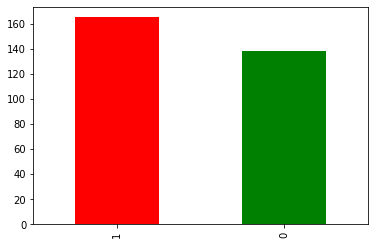

In [ ]:
# check the balance between the two classesof the target 
data["target"].value_counts().plot(kind="bar", color = ["red","green"]);
data["target"].value_counts()


It is clear that there is no significant imbalance between the two classes. This insigt is important to know whether the problem is traditional binary classification or anomaly detection ? and it will also help us in selection of model evaluation metrics. 

In [ ]:
# lets check the correlation among our features
data.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


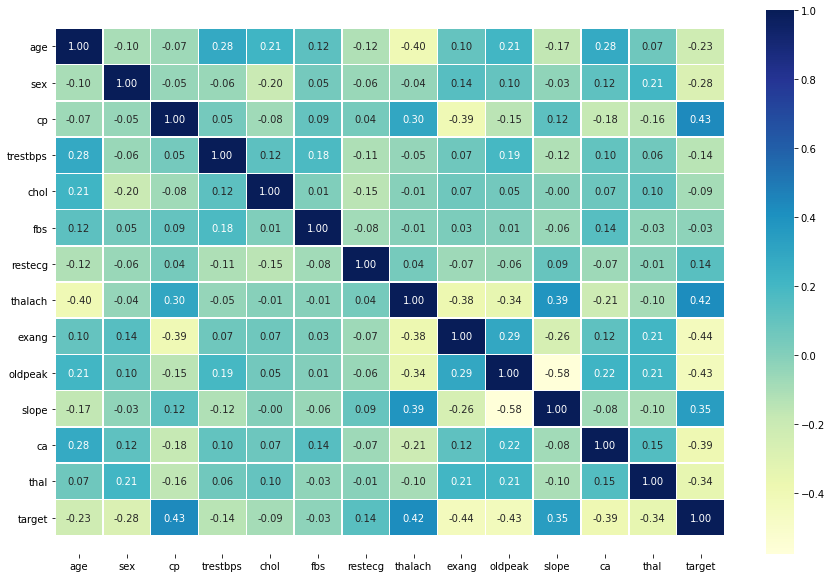

In [ ]:
# Lets visualize it with the heatmap instead of looking at the correlation coeffiecients only!


corr_max = data.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_max,
              annot = True,
               linewidth = 0.5,
              fmt = ".2f",
              cmap = "YlGnBu")
# to correct bottom and top cut
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

We can notice that there is no features have strong correlation with the target value, however there are 6 features have moderate correlation, 3 of them with postive correlation (cp, thalach, slope) and 3 of them with negative correlation (exang, oldpeak, ca).


> We can not generalize our findings because we have a small dataset with only 303 examples!


> Correlation strenght is a good metric for the predictive power of features.





# <font color='red'>  Modeling </font>

In [ ]:
# Lets check again our data
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1




> From EDA we have revealed that our data is very clean, without missed data, and features are numerical values, therfore no data preprocessing is required, and we can dive further in modeling stage.  



In [ ]:
# Splitting data 
x = data.drop(["fbs","chol","target"], axis = 1) 
# I dropped the features with least correlation which can mislead the models, and also dropped the target value

y = data["target"]
np.random.seed(42) # random seed for reproduciblity of the result.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
# put model in dictionary for easy comparing between them based on their evalution metrics.

models = {"logistic regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": GradientBoostingClassifier()}
# create a function to score and fit
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fit and evaluate given machine learning model
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to store a score
    model_score = {}
    #loop through models
    
    for name,model in models.items():
        #fit the model
        model.fit(x_train, y_train)
        #evaluate the model and append its value to model score
        model_score[name] = model.score(x_test, y_test)
        
    return model_score

In [ ]:
model_score = fit_and_score(models=models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

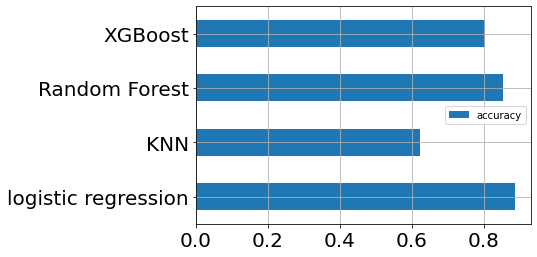

In [ ]:
# Lets visualize model_score
model_comparsion = pd.DataFrame(model_score,index=["accuracy"])
model_comparsion.T.plot(fontsize= 20, grid= "True", kind = "barh");
plt.xticks(rotation = 0)


## this is the baseline model result so it can be tune up to better result by adjusting hyperparameters  


# <font color='blue'>  Hyperparameters Tunning </font>

## KNN

In [ ]:
# lets tunn KNN
# create storing list 
train_score = []
test_score = []
knn = KNeighborsClassifier()

# tunning parameter is nighbors
neighbors = range(1,21)

for i in neighbors:
    # set parameters
    knn.set_params(n_neighbors  = i)
    knn.fit(x_train,y_train)
    # update the list for stor the score
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

the maximum accuracy of KNN score on test data is : 78.69%


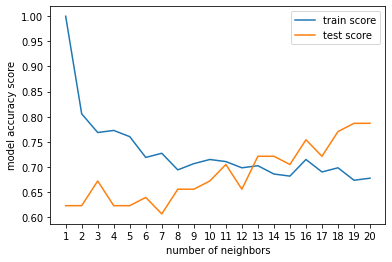

In [ ]:
#test_score
# lets visualize it
plt.plot(neighbors,train_score, label = "train score")
plt.plot(neighbors, test_score, label = "test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("model accuracy score")
plt.legend()


print(f"the maximum accuracy of KNN score on test data is : {max(test_score)*100:.2f}%")


In [ ]:
KNN_after_Tunning= max(test_score)
KNN_after_Tunning

0.7868852459016393

## Logistic Regression
we will use Grid Search technique for tunning our hyperparameters 

In [ ]:
clf = LogisticRegression()
# create hyperparameter grid for logistic regression
#clf = LogisticRegression()
#clf.get_params()


log_reg_grid = {"C":np.logspace(-4, 4,20),
               "solver": ["liblinear"]} # Liblinear is good for small datasset.

#create hyperparameter for random forest
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }
#create hyperparameter for XGBoost
rf_grid2 = {"n_estimators": np.arange(10,1000,50),
            "learning_rate":[0.005, 0.01, 0.02, 0.05, 0.1,0.2],
          "max_depth": [None,1, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }


In [ ]:
# tuning logistic regression
np.random.seed(42)
# model using randomizedsearchcv
clf_lgr = RandomizedSearchCV(estimator=LogisticRegression(),
                             param_distributions=log_reg_grid,
                            n_iter=20,
                            cv = 5,
                            verbose=True)
# fit to new model
clf_lgr.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
# getting best parameters after tunning
clf_lgr.best_params_


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# scoring the model on test dataset
LogisticRegression_after_tunning = clf_lgr.score(x_test, y_test)
LogisticRegression_after_tunning


0.8852459016393442

##  Random Forest



In [ ]:
np.random.seed(42)
clf2 = RandomForestClassifier()
clf_rf = RandomizedSearchCV(estimator=clf2,
                             param_distributions=rf_grid,
                            n_iter=20,
                            cv = 5,
                            verbose=True)
# fit to the model
clf_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# evaluation
RandomForest_after_tuning = clf_rf.score(x_test, y_test)
RandomForest_after_tuning

0.8688524590163934

## XGBoost

In [ ]:
np.random.seed(42)
clf3 = GradientBoostingClassifier()
clf_rf3 = RandomizedSearchCV(estimator=clf3,
                             param_distributions=rf_grid2,
                            n_iter=20,
                            cv = 5,
                            verbose=True)
# fit to the model
clf_rf3.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
# evaluation
XGBoost_score_after_tunning = clf_rf3.score(x_test, y_test)
XGBoost_score_after_tunning

0.8524590163934426

# Comparing Model accuracy after Tuning

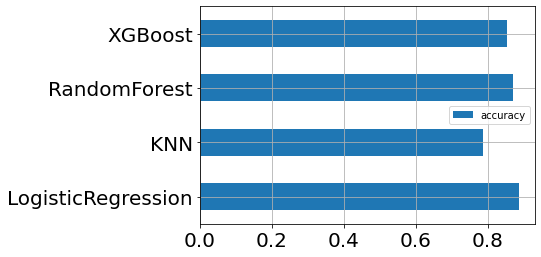

In [ ]:
# Lets visualize model_score
model_score_after_tunnig = {"LogisticRegression": LogisticRegression_after_tunning,
                            "KNN": KNN_after_Tunning,
                            "RandomForest" :RandomForest_after_tuning,
                            "XGBoost" :XGBoost_score_after_tunning}
model_comparsion = pd.DataFrame(model_score_after_tunnig,index=["accuracy"])
model_comparsion.T.plot(  fontsize= 20,grid= "True" ,kind = "barh");
plt.xticks(rotation = 0);

## It turns out that the best model after Tunning is Logistic Regression
We will use it in the next steps to calculate other evaluation metrics


# <font color='red'>  Model Evaluation </font>
## we will calcualte the following metrics


*   ROC curve
* confusion matrix
* classification report
* precision score
* recall score
* F1 - score





In [ ]:
# lets get y_preds (the predictin) to calculate the evaluation metrics
y_preds = clf_lgr.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

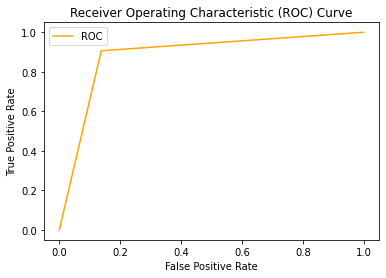

In [ ]:
# ROC is the ratio of true positive rate(Recall or Sensitivity) vs false positive rate (1- Specificity)
# import roc

def plot_roc_cur(FPR, TPR):  
    plt.plot(FPR, TPR, color='orange', label='ROC')
    #plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
FPR, TPR, thresholds = roc_curve(y_test, y_preds) 
plot_roc_cur(FPR, TPR)

In [ ]:
# confussion matrix
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


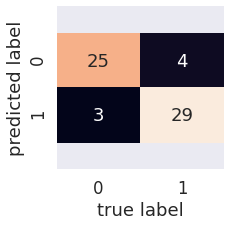

In [ ]:
# using seaborn plot confusion matrix  heatmap

sns.set(font_scale=1.5)

def confu_mat_plot(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
confu_mat_plot(y_test, y_preds)

In [ ]:
#classification report which is very helpful in case of imbalance between the target classes as well as To roll out the Precision and Recall

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# <font color='blue'>  Check the generaliztion of the model using Cross-validation Accuracy  </font>


In [ ]:
# lets use cross_val for accuracy
cr_val_accuracy = cross_val_score(clf_lgr,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="accuracy")
cr_val_accuracy


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


array([0.80327869, 0.90163934, 0.85245902, 0.86666667, 0.75      ])

In [ ]:
# Mean Accuracy
accuracy = np.mean(cr_val_accuracy)
accuracy

0.834808743169399

In [ ]:
# crossvalidation on precision
cr_val_precision = cross_val_score(clf_lgr,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="precision")
cr_val_precision

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


array([0.78378378, 0.88571429, 0.83333333, 0.85714286, 0.725     ])

In [ ]:
# Mean Precision
precision = np.mean(cr_val_precision)
precision

0.816994851994852

## Precision is very important evaluation metric in Medical Diagnosis (which is our case) because we are more concenerned to minimized the False Negative than The False postive.

In [ ]:
# crossvalidation on recall
cr_val_recall = cross_val_score(clf_lgr,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="recall")
cr_val_recall


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


array([0.87878788, 0.93939394, 0.90909091, 0.90909091, 0.87878788])

In [ ]:
# Mean Recall
recall = np.mean(cr_val_recall)
recall

0.9030303030303031

In [ ]:
# crossvalidation on F1
cr_val_F1 = cross_val_score(clf_lgr,
                                 x,
                                 y,
                                 cv = 5,
                                 scoring="f1")
cr_val_F1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


array([0.82857143, 0.91176471, 0.86956522, 0.88235294, 0.79452055])

In [ ]:
# Mean of F1.score
F1 = np.mean(cr_val_F1)
F1

0.8573549681933523

In [ ]:
# Summary of the Mean Cross-validation evaluation metrics
print(f"the accuracy of logistic regression model is: {np.mean(cr_val_accuracy)*100:.2F}%")
print(f"the precision of logistic regression model is: {np.mean(cr_val_precision)*100:.2F}%")
print(f"the recall score of logistic regression model is: {np.mean(cr_val_recall)*100:.2F}%")
print(f"the F1 score of logistic regression model is: {np.mean(cr_val_F1)*100:.2F}%")

the accuracy of logistic regression model is: 83.48%
the precision of logistic regression model is: 81.70%
the recall score of logistic regression model is: 90.30%
the F1 score of logistic regression model is: 85.74%


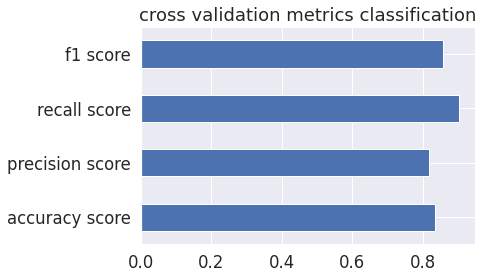

In [ ]:
# visualization of the summary of Mean evaluation metrics 

cv_metics = pd.DataFrame({"accuracy score":np.mean(cr_val_accuracy),
                         "precision score": np.mean(cr_val_precision),
                         "recall score": np.mean(cr_val_recall),
                         "f1 score": np.mean(cr_val_F1)},
                        index=[0])
#cv_metics.plot.bar()
cv_metics.T.plot.barh(grid= "True", title = "cross validation metrics classification",
                    legend = False);


# Saving the model 
it is desirable to have a way to persist the model for future use without having to retrain.

In [ ]:
import pickle
clf_LogisticRegression = pickle.dumps(clf_lgr)

# To load the model, we use 
# Model = pickle.loads(clf_lgr)

# Aknwoledgement
I would to thank 
* 1.The owner of this notebook on Github 
https://github.com/dawitmamo/ds_and_ML/blob/master/project_one%20(heart-disease).ipynb

* 2.The owners of this notebooks on Kaggle 
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
https://www.kaggle.com/bulentsiyah/heart-disease-prediction-using-neural-networks/data?select=heart.csv

* 3.Zero To Mastery Academy 
https://zerotomastery.io/

They all really helped me to accomplish this work, and I am very Grateful for them.